In [157]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt

def draw(route):
    x_sol = route

    
    
    plt.title('Optimized tour')
    plt.scatter(positions[:, 0], positions[:, 1])             # plot B
    
    start_node = 0
    distance = 0.
    for i in range(N):
        start_pos = positions[start_node]
        #next_node = np.argmax(x_sol[start_node]) # needed because of MIP-approach used for TSP
        next_node = x_sol[i+1]
        end_pos = positions[next_node]
        plt.annotate("",
                xy=start_pos, xycoords='data',
                xytext=end_pos, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
        distance += np.linalg.norm(end_pos - start_pos)
        start_node = next_node

    textstr = "Total length: %.3f" % distance
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14, # Textbox
            verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()

In [158]:
def cost(route):
    prev = 0
    cost = 0
    for i in range(1,len(route)):
        cost = cost + c[prev][route[i]]
        prev = route[i]
    return cost

def traverse_down(a,b):
    for i in range(a-1,b-1,-1):
        route(i)

def traverse_up(a,b):
    for i in range(a+1,b+1):
        route(i)

        
def route(i):
    global new_route
    new_route = new_route + [curr_route[i]]



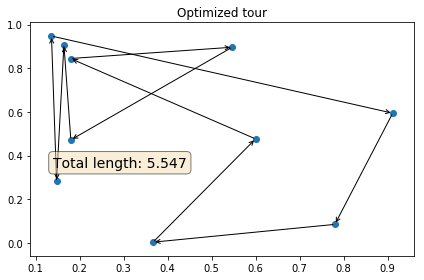

[0 1 2 3 4 5 6 7 8 9 0]


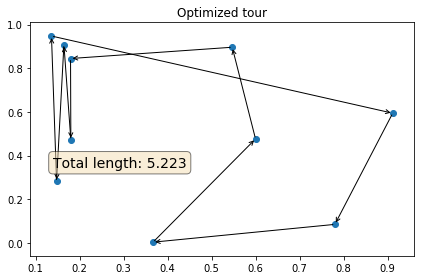

[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 0]


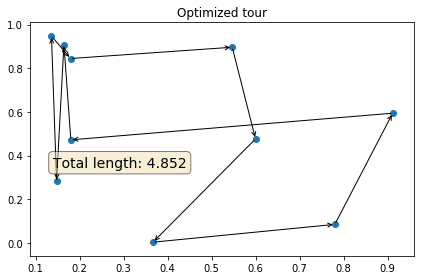

[0, 6, 5, 4, 3, 1, 2, 7, 8, 9, 0]


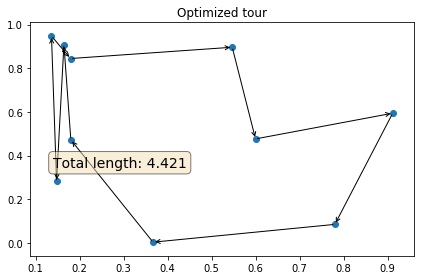

[0, 4, 5, 6, 3, 1, 2, 7, 8, 9, 0]


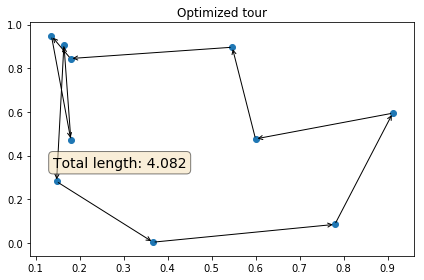

[0, 7, 2, 1, 3, 6, 5, 4, 8, 9, 0]


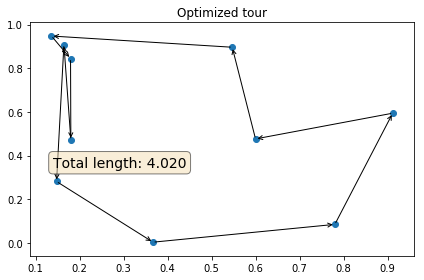

[0, 2, 7, 1, 3, 6, 5, 4, 8, 9, 0]


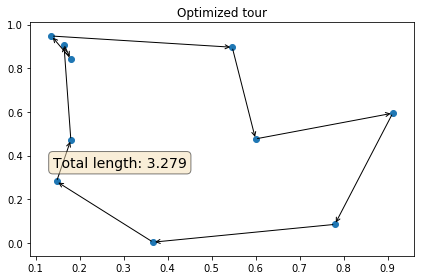

[0, 8, 4, 5, 6, 3, 1, 7, 2, 9, 0]


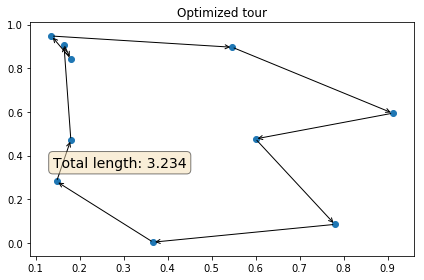

[0, 8, 4, 5, 3, 6, 1, 7, 2, 9, 0]


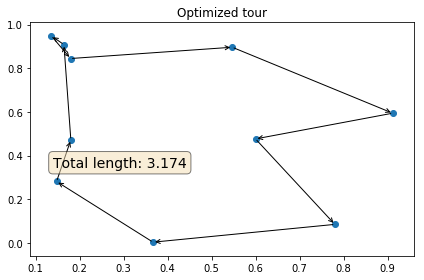

[0, 8, 4, 5, 3, 6, 1, 2, 7, 9, 0]
No more 2-opt improvements possible 
Nubmer of iterations: %d 8
[0, 8, 4, 5, 3, 6, 1, 7, 2, 9, 0]


In [166]:
positions = np.random.rand(10,2)
N = len(positions)
c = [[pow((x[0]-y[0])**2+(x[1]-y[1])**2,0.5) for x in positions] for y in positions]
curr_route = np.arange(N)
curr_route = np.append(curr_route,0)
curr_cost = cost(curr_route)
draw(curr_route)

def two_opt():
    global curr_cost
    global curr_route
    global new_route
    print(curr_route)
    for i in range(N-3):
        for j in range(2,N-1-i):
            new_route=[]
            route(0)
            traverse_up(0,i)

            route(i+j)
            traverse_down(i+j,i+1)
            route(i+j+1)
            traverse_up(i+j+1,N)

            #print(new_route)
            new_cost = cost(new_route)
            if new_cost < curr_cost:
                curr_route = new_route
                curr_cost = new_cost
                draw(new_route)
                return(True)
    return(False)
            
for i in range(400):
    if not two_opt():
        print("No more 2-opt improvements possible ")
        print("Nubmer of iterations: %d", i )
        print(new_route)
        break

        
        
    